In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00


In [57]:
df = pd.read_csv('Tata.csv')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [58]:
data = df.sort_index(ascending=True, axis=0)
df1 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    df1['Date'][i] = data['Date'][i]
    df1['Close'][i] = data['Close'][i]

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,8

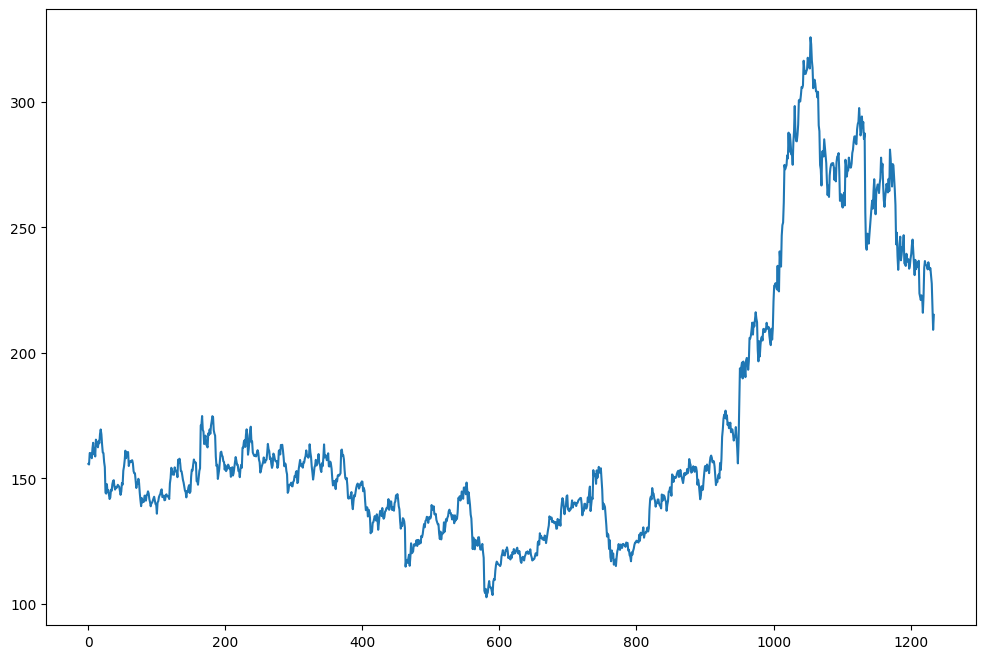

In [59]:
plt.plot(df1['Close'], label='Close Price history')

In [60]:
adf_test(df1['Close'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -0.954896
p-value                    0.769358
# lags used               16.000000
# observations          1218.000000
critical value (1%)       -3.435730
critical value (5%)       -2.863916
critical value (10%)      -2.568035
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [11]:
df1 = df1.sort_index(ascending=True, axis=0)

<Figure size 1200x800 with 0 Axes>

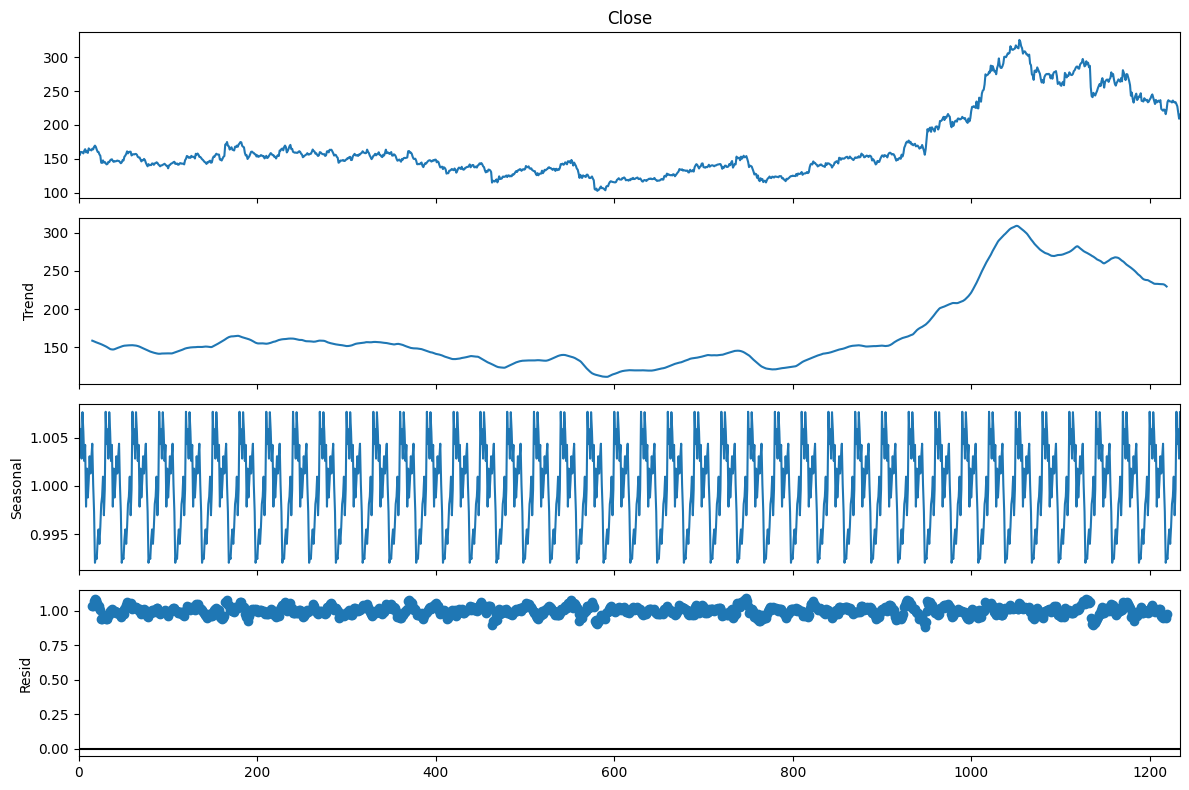

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
result = seasonal_decompose(df1['Close'], model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()


In [62]:
auto_arima(df1['Close'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1235
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3321.933
Date:                Sun, 03 Mar 2024   AIC                           6653.867
Time:                        17:41:27   BIC                           6679.457
Sample:                             0   HQIC                          6663.493
                               - 1235                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0172      0.029     -0.583      0.560      -0.075       0.041
ar.L2         -0.9110      0.030    -30.039      0.000      -0.970      -0.852
ma.L1         -0.0053      0.023     -0.232      0.817      -0.050       0.039
ma.L2          0.9500      0.023     40.564      0.000       0.904       0.996
sigma2        12.7551      0.247     51.567      0.000      12.270      13.240
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):              3122.89
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               3.51   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [69]:
len(df1)

1235

In [70]:
train = df1.iloc[:986]
test = df1.iloc[986:]

In [72]:
model = sm.tsa.arima.ARIMA(train['Close'].astype(float), order=(2,1,2))
results = model.fit()

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  986
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2399.284
Date:                Sun, 03 Mar 2024   AIC                           4808.568
Time:                        18:19:26   BIC                           4833.031
Sample:                             0   HQIC                          4817.872
                                - 986                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8046      0.104    -17.363      0.000      -2.008      -1.601
ar.L2         -0.8412      0.094     -8.919      0.000      -1.026      -0.656
ma.L1          1.8174      0.112     16.282      0.000       1.599       2.036
ma.L2          0.8411      0.106      7.907      0.000       0.633       1.050
sigma2         7.6415      0.202     37.814      0.000       7.245       8.038
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               942.49
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

In [75]:
predictions=pd.DataFrame(predictions)

In [76]:
test_date=list(test.index)

In [77]:
predictions = predictions.reset_index(drop=True)

In [78]:
predictions

,predicted_mean
0,210.304619
1,209.405919
2,210.308759
3,209.435530
4,210.251840
...,...
244,209.860922
245,209.860922
246,209.860922
247,209.860922


In [79]:
predictions['Date']=test_date

In [80]:
predictions

,predicted_mean,Date
0,210.304619,986
1,209.405919,987
2,210.308759,988
3,209.435530,989
4,210.251840,990
...,...,...
244,209.860922,1230
245,209.860922,1231
246,209.860922,1232
247,209.860922,1233


In [81]:
predictions.set_index("Date", inplace=True)

In [82]:
predictions

,predicted_mean
Date,
986,210.304619
987,209.405919
988,210.308759
989,209.435530
990,210.251840
...,...
1230,209.860922
1231,209.860922
1232,209.860922


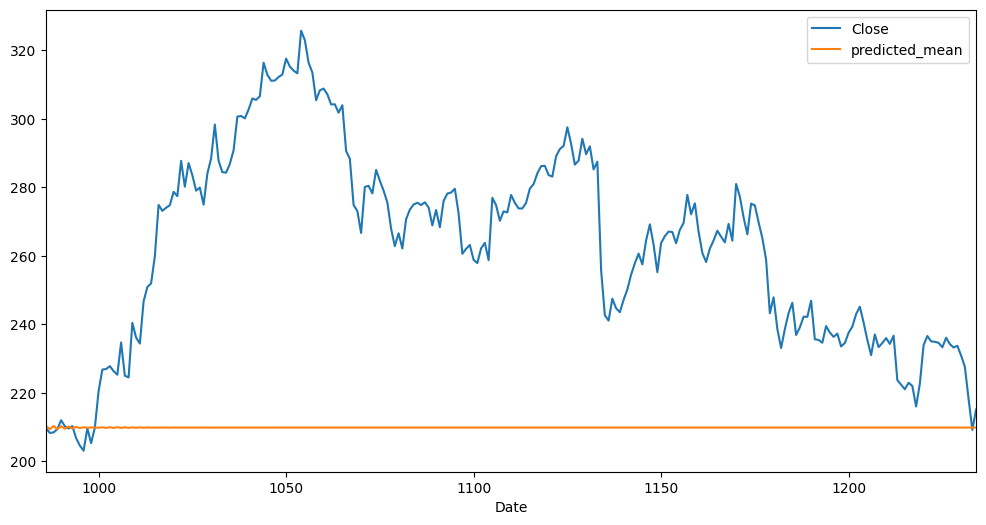

In [83]:
ax = test['Close'].plot(legend=True,figsize=(12,6))
predictions['predicted_mean'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [84]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Close'], predictions['predicted_mean'])
print(f'ARIMA(2,1,2) MSE Error: {error:11.10}')

ARIMA(2,1,2) MSE Error: 3586.533853


In [85]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Close'], predictions['predicted_mean'])
print(f'ARIMA(2,1,2) RMSE Error: {error:11.10}')

ARIMA(2,1,2) RMSE Error: 59.88767697


In [86]:
auto_arima(train['Close'],seasonal=True,m= 7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  986
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -2398.748
Date:                Sun, 03 Mar 2024   AIC                           4807.496
Time:                        18:21:09   BIC                           4831.959
Sample:                             0   HQIC                          4816.801
                                - 986                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8271      0.070    -11.747      0.000      -0.965      -0.689
ma.L1          0.8356      0.074     11.307      0.000       0.691       0.980
ma.L2          0.0229      0.029      0.792      0.428      -0.034       0.080
ma.L3          0.0813      0.030      2.696      0.007       0.022       0.140
sigma2         7.6336      0.221     34.590      0.000       7.201       8.066
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               899.43
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
model = SARIMAX(train['Close'],order=(1,1,3))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  986
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -2398.748
Date:                Sun, 03 Mar 2024   AIC                           4807.496
Time:                        17:26:07   BIC                           4831.959
Sample:                             0   HQIC                          4816.801
                                - 986                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8271      0.070    -11.747      0.000      -0.965      -0.689
ma.L1          0.8356      0.074     11.307      0.000       0.691       0.980
ma.L2          0.0229      0.029      0.792      0.428      -0.034       0.080
ma.L3          0.0813      0.030      2.696      0.007       0.022       0.140
sigma2         7.6336      0.221     34.590      0.000       7.201       8.066
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               899.43
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,3) Predictions')

In [36]:
predictions=pd.DataFrame(predictions)
test_date=list(test.index)
predictions = predictions.reset_index(drop=True)
predictions['Date']=test_date
predictions.set_index("Date", inplace=True)

In [37]:
predictions

,"SARIMA(1,1,3) Predictions"
Date,
2017-10-06,210.094796
2017-10-09,209.474460
2017-10-10,210.406861
2017-10-11,209.635676
2017-10-12,210.273520
...,...
2018-10-01,209.984779
2018-10-03,209.984779
2018-10-04,209.984779


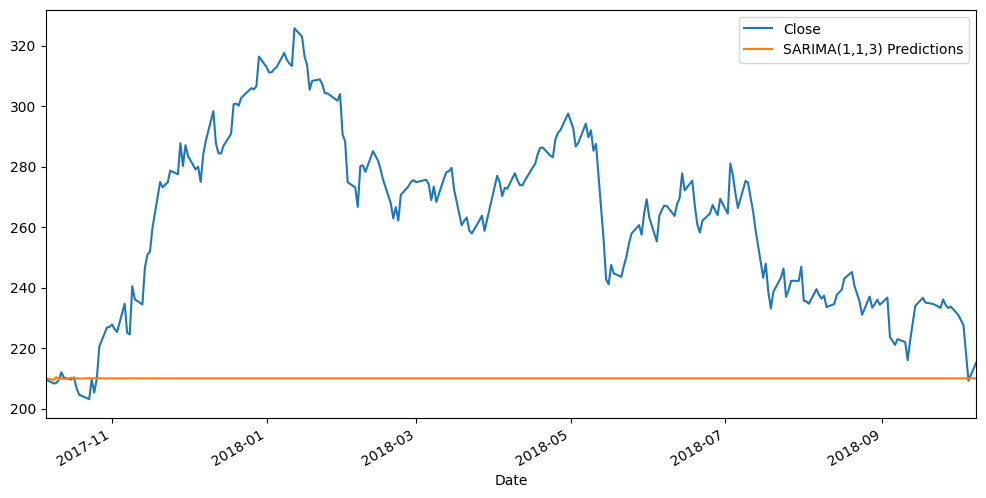

In [39]:
ax = test['Close'].plot(legend=True,figsize=(12,6))
predictions['SARIMA(1,1,3) Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [40]:
error = rmse(test['Close'], predictions['SARIMA(1,1,3) Predictions'])
print(f'ARIMA(2,1,2) RMSE Error: {error:11.10}')

ARIMA(2,1,2) RMSE Error: 59.77890227


In [41]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [42]:
df = pd.read_csv('Tata.csv')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [43]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [44]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]


In [45]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [46]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=4, batch_size=1, verbose=2)

Epoch 1/4
927/927 - 11s - loss: 9.9602e-04 - 11s/epoch - 11ms/step
Epoch 2/4
927/927 - 6s - loss: 5.1185e-04 - 6s/epoch - 7ms/step
Epoch 3/4
927/927 - 6s - loss: 3.2185e-04 - 6s/epoch - 6ms/step
Epoch 4/4
927/927 - 6s - loss: 2.6549e-04 - 6s/epoch - 7ms/step


In [47]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

8/8 [==============================] - 1s 5ms/step


In [48]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

In [49]:
rms

10.210137868548193

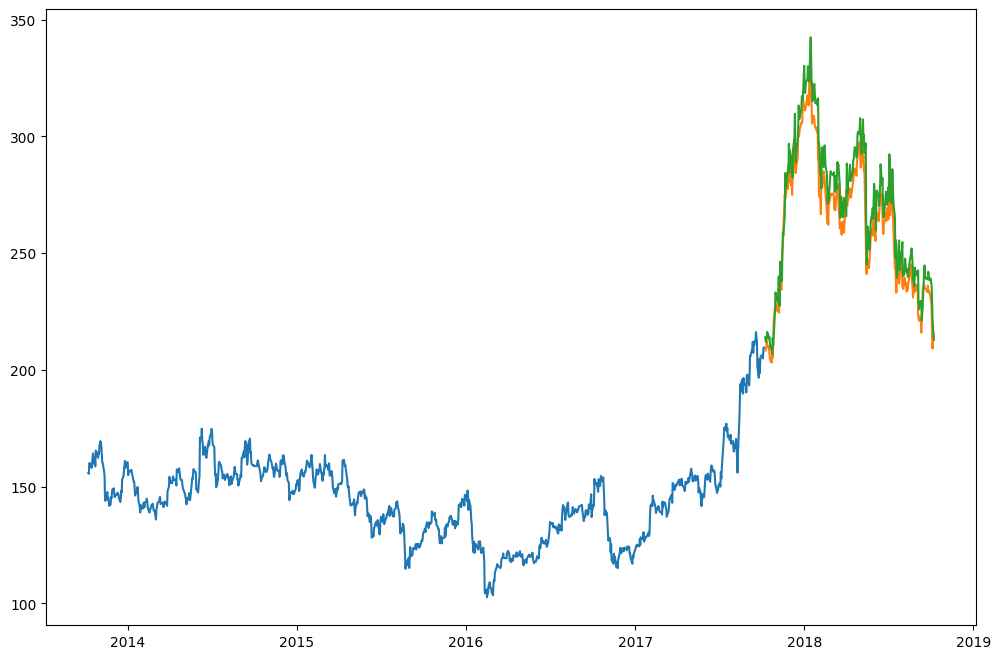

In [50]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])